<a href="https://www.kaggle.com/code/samyakb/optimizing-gradient-boosting-algos?scriptVersionId=162633348" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
titanic_data = pd.read_csv("/kaggle/input/titanic/train.csv")

# Let's do some basic preprocessing for simplicity
# Replace missing values and encode categorical variables
titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Select features and target variable
X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7988826815642458
Confusion Matrix:
[[93 12]
 [24 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [2]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Print the results
print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")
print("Confusion Matrix (Best Model):")
print(conf_matrix_best)
print("Classification Report (Best Model):")
print(class_report_best)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Model Accuracy: 0.8044692737430168
Confusion Matrix (Best Model):
[[92 13]
 [22 52]]
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [3]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model to the training data using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_random = best_model_random.predict(X_test)

# Evaluate the best model
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
conf_matrix_best_random = confusion_matrix(y_test, y_pred_best_random)
class_report_best_random = classification_report(y_test, y_pred_best_random)

# Print the results
print("Best Parameters (Randomized Search):", best_params_random)
print(f"Best Model Accuracy (Randomized Search): {accuracy_best_random}")
print("Confusion Matrix (Best Model - Randomized Search):")
print(conf_matrix_best_random)
print("Classification Report (Best Model - Randomized Search):")
print(class_report_best_random)


Best Parameters (Randomized Search): {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.09444444444444444}
Best Model Accuracy (Randomized Search): 0.8156424581005587
Confusion Matrix (Best Model - Randomized Search):
[[90 15]
 [18 56]]
Classification Report (Best Model - Randomized Search):
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



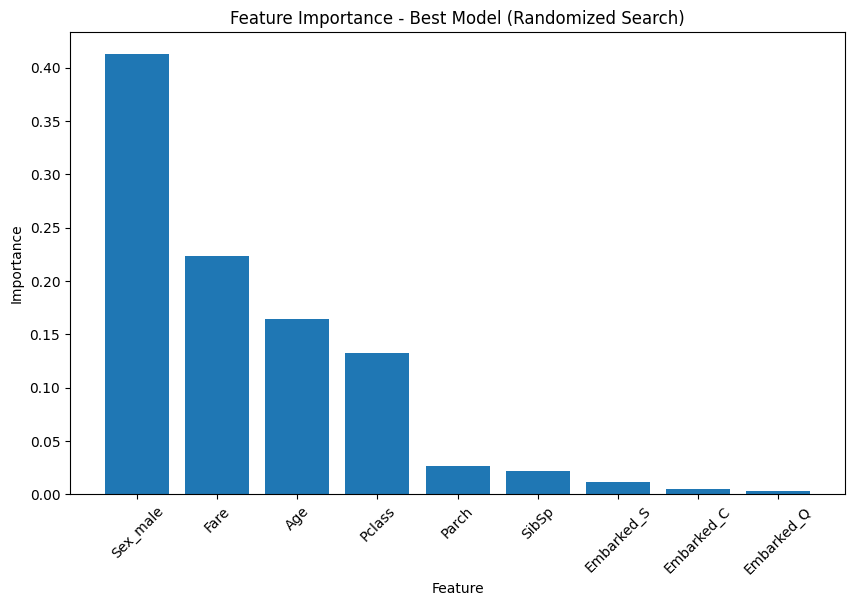

In [4]:
import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = best_model_random.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Best Model (Randomized Search)')
plt.show()


In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}

# Initialize the Gradient Boosting model with early stopping
gb_model_early_stopping = GradientBoostingClassifier(validation_fraction=0.1, n_iter_no_change=5, random_state=42)

# Initialize RandomizedSearchCV with early stopping
random_search_early_stopping = RandomizedSearchCV(estimator=gb_model_early_stopping,
                                                  param_distributions=param_dist, n_iter=10,
                                                  cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model to the training data using RandomizedSearchCV with early stopping
random_search_early_stopping.fit(X_train, y_train)

# Get the best parameters and best model with early stopping
best_params_random_early_stopping = random_search_early_stopping.best_params_
best_model_random_early_stopping = random_search_early_stopping.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_random_early_stopping = best_model_random_early_stopping.predict(X_test)

# Evaluate the best model with early stopping
accuracy_best_random_early_stopping = accuracy_score(y_test, y_pred_best_random_early_stopping)

# Print the results
print("Best Parameters (Randomized Search with Early Stopping):", best_params_random_early_stopping)
print(f"Best Model Accuracy (Randomized Search with Early Stopping): {accuracy_best_random_early_stopping}")


Best Parameters (Randomized Search with Early Stopping): {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1577777777777778}
Best Model Accuracy (Randomized Search with Early Stopping): 0.8044692737430168


In [6]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the objective function to be minimized
def objective(trial):
    # Define the search space for hyperparameters
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
    }

    # Initialize the Gradient Boosting model with early stopping
    gb_model = GradientBoostingClassifier(**param_space, validation_fraction=0.1, n_iter_no_change=5, random_state=42)

    # Fit the model to the training data
    gb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gb_model.predict(X_test)

    # Calculate accuracy as the objective to be minimized
    accuracy = accuracy_score(y_test, y_pred)

    return 1.0 - accuracy  # Optuna minimizes the objective, so we use 1 - accuracy

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best parameters and best model
best_params_optuna = study.best_params
best_model_optuna = GradientBoostingClassifier(**best_params_optuna, validation_fraction=0.1, n_iter_no_change=5, random_state=42)
best_model_optuna.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_best_optuna = best_model_optuna.predict(X_test)

# Evaluate the best model obtained through Optuna
accuracy_best_optuna = accuracy_score(y_test, y_pred_best_optuna)

# Print the results
print("Best Parameters (Optuna):", best_params_optuna)
print(f"Best Model Accuracy (Optuna): {accuracy_best_optuna}")


[I 2024-02-12 15:49:22,720] A new study created in memory with name: no-name-7a4953de-df07-4e3a-aca9-8712b29292e5
[I 2024-02-12 15:49:22,783] Trial 0 finished with value: 0.2067039106145251 and parameters: {'n_estimators': 50, 'learning_rate': 0.19400549388348734, 'max_depth': 3}. Best is trial 0 with value: 0.2067039106145251.
[I 2024-02-12 15:49:22,962] Trial 1 finished with value: 0.2122905027932961 and parameters: {'n_estimators': 200, 'learning_rate': 0.0858287363742511, 'max_depth': 5}. Best is trial 0 with value: 0.2067039106145251.
[I 2024-02-12 15:49:23,025] Trial 2 finished with value: 0.1955307262569832 and parameters: {'n_estimators': 100, 'learning_rate': 0.15835117885238895, 'max_depth': 4}. Best is trial 2 with value: 0.1955307262569832.
[I 2024-02-12 15:49:23,141] Trial 3 finished with value: 0.2178770949720671 and parameters: {'n_estimators': 200, 'learning_rate': 0.14983073938157251, 'max_depth': 7}. Best is trial 2 with value: 0.1955307262569832.
[I 2024-02-12 15:49:

Best Parameters (Optuna): {'n_estimators': 100, 'learning_rate': 0.07753305067083884, 'max_depth': 4}
Best Model Accuracy (Optuna): 0.8212290502793296
